In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Newton\Documents\household_power_consumption\household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values='?', dtype=float)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df["Global_active_power"].fillna(df["Global_active_power"].mean(), inplace=True)
df["Global_reactive_power"].fillna(df["Global_reactive_power"].mean(), inplace=True)
df["Voltage"].fillna(df["Voltage"].mean(), inplace=True)
df["Global_intensity"].fillna(df["Global_intensity"].mean(), inplace=True)
df["Sub_metering_1"].fillna(df["Sub_metering_1"].mean(), inplace=True)
df["Sub_metering_2"].fillna(df["Sub_metering_2"].mean(), inplace=True)
df["Sub_metering_3"].fillna(df["Sub_metering_3"].mean(), inplace=True)

df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [8]:
df_daily = df.resample('D').sum()
print(df_daily)

            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   
...                         ...                    ...        ...   
2010-11-22             2041.536                142.354  345883.85   
2010-11-23             1577.536                137.450  346428.76   
2010-11-24             1796.248                132.460  345644.59   
2010-11-25             1431.164                116.128  347812.21   
2010-11-26             1488.104                120.826  303487.57   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
datetime               

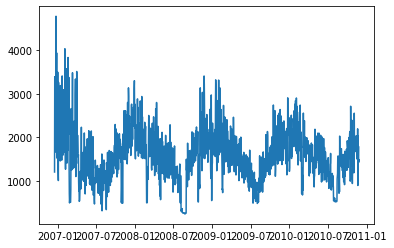

In [11]:
plt.plot(df_daily.index, df_daily['Global_active_power'])

In [19]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [24]:
x = new_df2.tail(365)
y = new_df2.head(365)

            Global_active_power  Global_reactive_power    Voltage  \
datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   
...                         ...                    ...        ...   
2007-12-12             1588.062                116.886  349165.91   
2007-12-13             1847.746                111.490  348231.37   
2007-12-14             1974.808                179.550  348459.73   
2007-12-15             2736.876                157.626  347444.13   
2007-12-16             2762.218                126.938  349466.38   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
datetime               

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65,test_size=0.35, random_state=101)

In [27]:
# resetting the index for df_daily and saving it as another dataframe (df_daily2)
df_daily2 = df_daily.reset_index()
df_daily2.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [28]:
# we only need the first two columns under df_daily2
df_daily2 = df_daily2[['datetime','Global_active_power']]
df_daily2.head()

,datetime,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [29]:
# making a new dataframe from df_daily2 but renaming the columns
new_df = df_daily2.rename(columns={"datetime": "ds", "Global_active_power": "y"})
new_df.head()

,ds,y
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [31]:
from fbprophet import Prophet
model = Prophet()
model.fit(new_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
# using prophet to predict for the next 12 days
future = model.make_future_dataframe(periods=12, freq='D') 
forecast = model.predict(future) 
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1652.518508,1823.572062,2844.995953,1652.518508,1652.518508,700.935538,700.935538,700.935538,215.005207,215.005207,215.005207,485.930331,485.930331,485.930331,0.0,0.0,0.0,2353.454046
1,2006-12-17,1652.338333,1771.995054,2838.684268,1652.338333,1652.338333,682.406888,682.406888,682.406888,181.847728,181.847728,181.847728,500.559160,500.559160,500.559160,0.0,0.0,0.0,2334.745221
2,2006-12-18,1652.158158,1521.144739,2539.311053,1652.158158,1652.158158,384.822240,384.822240,384.822240,-130.489641,-130.489641,-130.489641,515.311881,515.311881,515.311881,0.0,0.0,0.0,2036.980398
3,2006-12-19,1651.977983,1625.677863,2698.750165,1651.977983,1651.977983,499.483735,499.483735,499.483735,-30.320968,-30.320968,-30.320968,529.804703,529.804703,529.804703,0.0,0.0,0.0,2151.461718
4,2006-12-20,1651.797808,1632.867088,2708.987966,1651.797808,1651.797808,531.741765,531.741765,531.741765,-11.914699,-11.914699,-11.914699,543.656464,543.656464,543.656464,0.0,0.0,0.0,2183.539573
5,2006-12-21,1651.617633,1536.386005,2575.474731,1651.617633,1651.617633,401.256764,401.256764,401.256764,-155.243241,-155.243241,-155.243241,556.500005,556.500005,556.500005,0.0,0.0,0.0,2052.874397
6,2006-12-22,1651.437458,1572.538519,2641.435071,1651.437458,1651.437458,499.108779,499.108779,499.108779,-68.884386,-68.884386,-68.884386,567.993165,567.993165,567.993165,0.0,0.0,0.0,2150.546237
7,2006-12-23,1651.257283,1872.096679,2989.495928,1651.257283,1651.257283,792.834294,792.834294,792.834294,215.005207,215.005207,215.005207,577.829086,577.829086,577.829086,0.0,0.0,0.0,2444.091577
8,2006-12-24,1651.077108,1864.977058,2977.021860,1651.077108,1651.077108,767.593267,767.593267,767.593267,181.847728,181.847728,181.847728,585.745539,585.745539,585.745539,0.0,0.0,0.0,2418.670375
9,2006-12-25,1650.896933,1539.411337,2656.537324,1650.896933,1650.896933,461.043364,461.043364,461.043364,-130.489641,-130.489641,-130.489641,591.533005,591.533005,591.533005,0.0,0.0,0.0,2111.940297


In [33]:
# comparing yhat(predictions) and the trends

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2353.454046,1823.572062,2844.995953,1652.518508,1652.518508,1652.518508
1,2006-12-17,2334.745221,1771.995054,2838.684268,1652.338333,1652.338333,1652.338333
2,2006-12-18,2036.980398,1521.144739,2539.311053,1652.158158,1652.158158,1652.158158
3,2006-12-19,2151.461718,1625.677863,2698.750165,1651.977983,1651.977983,1651.977983
4,2006-12-20,2183.539573,1632.867088,2708.987966,1651.797808,1651.797808,1651.797808
...,...,...,...,...,...,...,...
1449,2010-12-04,2220.462003,1624.943115,2740.480374,1586.790552,1586.790552,1586.790552
1450,2010-12-05,2183.066895,1598.216195,2668.716131,1586.859310,1586.859310,1586.859310
1451,2010-12-06,1868.068033,1287.986755,2385.955334,1586.928067,1586.928067,1586.928067
1452,2010-12-07,1967.365205,1505.241299,2498.678076,1586.996824,1586.996824,1586.996824


In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
# MAPE
mean_absolute_percentage_error(forecast['trend'], forecast['yhat'])

21.79212967200097

In [36]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(forecast['trend'], forecast['yhat']))
print(rmse)

420.0084246954627


C:\Users\Newton\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


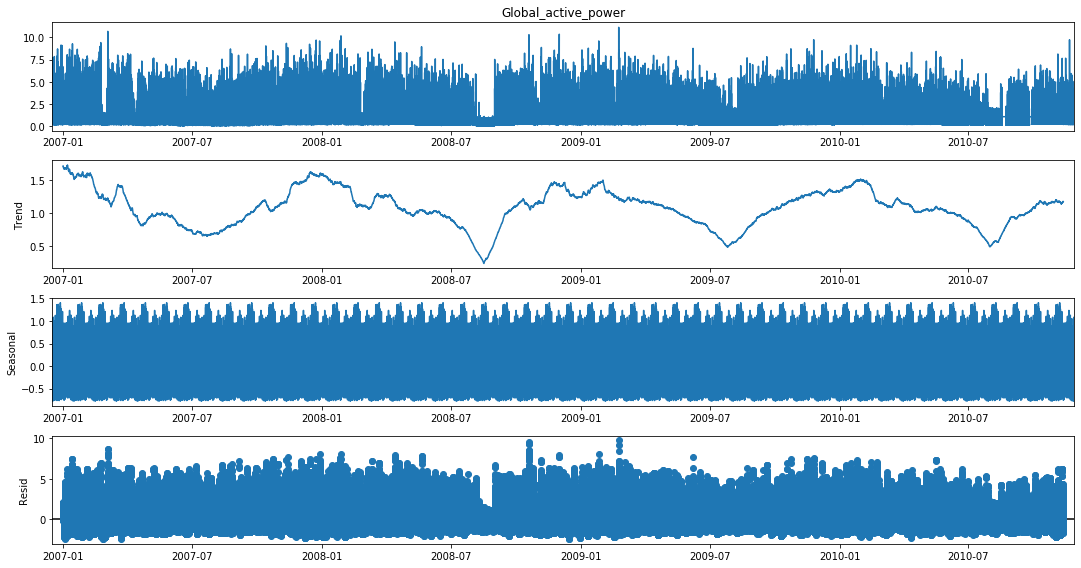

In [42]:
import statsmodels.api as sm
from pylab import rcParams

rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', freq= (60*24*30) )
decompose_series.plot()
plt.show()

In [58]:
df_daily3 = df_daily.reset_index()
df_daily3.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [65]:
new_df2 = df_daily3.rename(columns={ 'datetime': 'ds', "Global_active_power": "y", "Global_reactive_power": "add1", "Voltage": "add2", 'Global_intensity': 'add3', 'Sub_metering_1': 'add4', 'Sub_metering_2': 'add5', 'Sub_metering_3': 'add6'})
new_df2.head()

,ds,add1,add2,add3,add4,add5,add6
0,2006-12-16,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [50]:
x = new_df2.tail(365)
y = new_df2.head(365)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.65,test_size=0.35, random_state=101)
